In [2]:
import requests
from datetime import datetime, timedelta
import os

year = 2023
folder_name = str(year)

if not os.path.exists(folder_name):
    os.makedirs(folder_name)


start_date = datetime(year, 1, 1)
end_date = datetime(year, 12, 31)

current_date = start_date
while current_date <= end_date:
    # Generate the file name in yyyymmdd format
    file_name = current_date.strftime('%Y%m%d') + '.pdf'
    file_url = f"https://cpcb.nic.in//upload/Downloads/AQI_Bulletin_{file_name}"
    
    file_path = os.path.join(folder_name, file_name)

    # Attempt to download the file
    response = requests.get(file_url, stream=True)
    if response.status_code == 200:
        # Save the file
        with open(file_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Downloaded: {file_name}")
    else:
        print(f"File not found for date: {current_date.strftime('%Y-%m-%d')}")

    # Move to the next day
    current_date += timedelta(days=1)


Downloaded: 20230101.pdf
Downloaded: 20230102.pdf
Downloaded: 20230103.pdf
Downloaded: 20230104.pdf
Downloaded: 20230105.pdf
Downloaded: 20230106.pdf
Downloaded: 20230107.pdf
Downloaded: 20230108.pdf
Downloaded: 20230109.pdf
Downloaded: 20230110.pdf
Downloaded: 20230111.pdf
Downloaded: 20230112.pdf
Downloaded: 20230113.pdf
Downloaded: 20230114.pdf
Downloaded: 20230115.pdf
Downloaded: 20230116.pdf
Downloaded: 20230117.pdf
Downloaded: 20230118.pdf
Downloaded: 20230119.pdf
Downloaded: 20230120.pdf
Downloaded: 20230121.pdf
Downloaded: 20230122.pdf
Downloaded: 20230123.pdf
Downloaded: 20230124.pdf
Downloaded: 20230125.pdf
Downloaded: 20230126.pdf
Downloaded: 20230127.pdf
Downloaded: 20230128.pdf
Downloaded: 20230129.pdf
Downloaded: 20230130.pdf
Downloaded: 20230131.pdf
Downloaded: 20230201.pdf
Downloaded: 20230202.pdf
Downloaded: 20230203.pdf
Downloaded: 20230204.pdf
Downloaded: 20230205.pdf
Downloaded: 20230206.pdf
Downloaded: 20230207.pdf
Downloaded: 20230208.pdf
Downloaded: 20230209.pdf


In [2]:
import pdfplumber

In [3]:
with pdfplumber.open(f'2023/20230101.pdf') as pdf:
    print(pdf)

In [4]:
import pdfplumber

# Path to the PDF file
pdf_path = f'2023/20230101.pdf'

# Open the PDF file
with pdfplumber.open(pdf_path) as pdf:
    # Loop through each page
    table = pdf.pages[0].extract_table()
    if table:
        print(table[2])
    else:
        print("No found on this page.")


['2', 'Agra', 'Satisfactory', '76', 'PM , PM\n2.5 10', '6']


In [5]:
aqi

NameError: name 'aqi' is not defined

In [ ]:
severe_count = 0
verypoor_count = 0
poor_count = 0
satisfactory_count = 0
moderate_count = 0
good_count = 0

In [6]:
import os
from collections import Counter

# Path to the folder containing PDF files
folder_path = '2023/'

# List to store the extracted AQI data along with date
aqi_data = []
aqi_tag_counter = Counter()
pollutant_counter = Counter()

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.pdf'):
        # Extract date from the filename
        date = filename.split('.')[0]  # Assumes filename format YYYYMMDD.pdf
        pdf_path = os.path.join(folder_path, filename)
        
        # Open the PDF file
        with pdfplumber.open(pdf_path) as pdf:
            # Extract data from the first page as per previous logic
            table = pdf.pages[0].extract_table()
            if table:
                aqi = table[3][3]  # Adjust based on the table structure
                aqi_tag = table[3][2]
                pollutants = table[3][4]
                aqi_data.append((date, aqi, aqi_tag, pollutants))
                
                if aqi_tag:
                    aqi_tag_counter[aqi_tag.strip().lower()] += 1
                
                if pollutants:
                    for pollutant in pollutants.split(','):
                        pollutant_counter[pollutant.strip()] += 1
            else:
                print(f"No table found in {filename}")

#replacing newlines with underscores
pollutant_counter = {key.replace('\n', '_'): value for key, value in pollutant_counter.items()}
    
# Print the counted pollutants
print("\nPollutant Counts:")
for pollutant, count in pollutant_counter.items():
    print(f"{pollutant}: {count}")

# Print the counted AQI tags
print("\nAQI Tag Counts:")
for tag, count in aqi_tag_counter.items():
    print(f"{tag.capitalize()}: {count}")



Pollutant Counts:
NO_2: 3
PM_2.5: 67
PM_10: 127
PM: 141
PM_2.5 10: 46
PM_10 2.5: 36
CO: 25
NO_10 2: 10
NO_2.5 2: 27
CO_10: 12
SO_10 2: 2
O_3: 23
O_10 3: 5
O: 1
PM_3 2.5 10: 1
O_10 2.5 3: 1

AQI Tag Counts:
Moderate: 200
Satisfactory: 147
Poor: 4
Good: 14


In [7]:
aqi_data

[('20230101', '127', 'Moderate', 'NO\n2'),
 ('20230102', '137', 'Moderate', 'PM\n2.5'),
 ('20230103', '110', 'Moderate', 'PM\n10'),
 ('20230104', '110', 'Moderate', 'PM\n10'),
 ('20230105', '110', 'Moderate', 'PM\n10'),
 ('20230106', '98', 'Satisfactory', 'PM\n2.5'),
 ('20230107', '85', 'Satisfactory', 'PM\n10'),
 ('20230108', '123', 'Moderate', 'PM\n10'),
 ('20230109', '136', 'Moderate', 'PM\n10'),
 ('20230110', '150', 'Moderate', 'PM\n10'),
 ('20230111', '141', 'Moderate', 'NO\n2'),
 ('20230112', '89', 'Satisfactory', 'PM\n10'),
 ('20230113', '254', 'Poor', 'PM , PM\n2.5 10'),
 ('20230114', '116', 'Moderate', 'PM , PM\n2.5 10'),
 ('20230115', '108', 'Moderate', 'PM\n10'),
 ('20230116', '116', 'Moderate', 'PM\n2.5'),
 ('20230117', '132', 'Moderate', 'PM , PM\n2.5 10'),
 ('20230118', '141', 'Moderate', 'PM\n2.5'),
 ('20230119', '112', 'Moderate', 'PM , PM\n10 2.5'),
 ('20230120', '151', 'Moderate', 'PM\n2.5'),
 ('20230121', '169', 'Moderate', 'PM\n2.5'),
 ('20230122', '120', 'Moderate'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the data to a DataFrame
df = pd.DataFrame(aqi_data, columns=["Date", "AQI", "AQI Tag", "Pollutants"])

In [9]:
df.head()

,Date,AQI,AQI Tag,Pollutants
0,20230101,127,Moderate,NO\n2
1,20230102,137,Moderate,PM\n2.5
2,20230103,110,Moderate,PM\n10
3,20230104,110,Moderate,PM\n10
4,20230105,110,Moderate,PM\n10


In [10]:
df["AQI"].dtype

dtype('O')

In [15]:
df["AQI"] = pd.to_numeric(df["AQI"])
df["Date"] = pd.to_datetime(df["Date"])


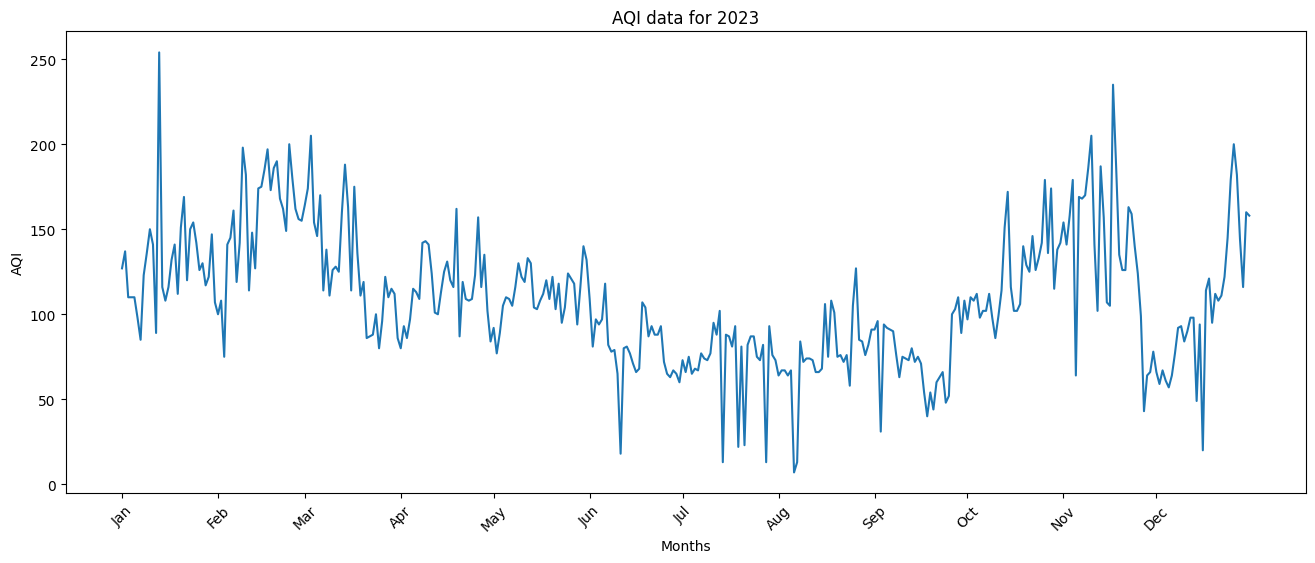

In [24]:
plt.figure(figsize=(16, 6))
monthly_ticks = pd.date_range(start="2023-01-01", end="2023-12-31", freq="MS")
plt.xticks(monthly_ticks, [date.strftime("%b") for date in monthly_ticks], rotation=45)
plt.plot(df["Date"], df["AQI"])
plt.title("AQI data for 2023")
plt.xlabel("Months")
plt.ylabel("AQI")
plt.show()

In [17]:
aqi_tag_counter

Counter({'moderate': 200, 'satisfactory': 147, 'good': 14, 'poor': 4})

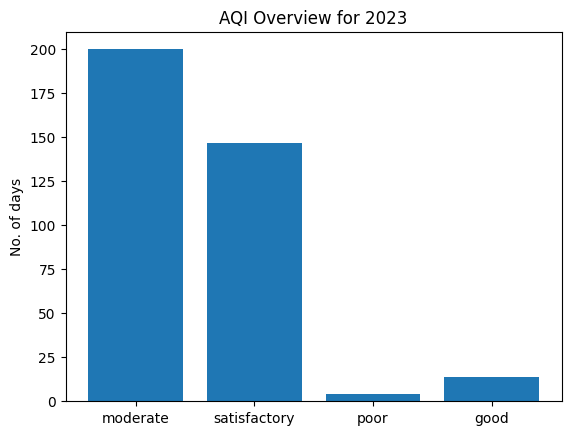

In [23]:
plt.bar(aqi_tag_counter.keys(), aqi_tag_counter.values())
plt.title("AQI Overview for 2023")
plt.ylabel("No. of days")
plt.show()

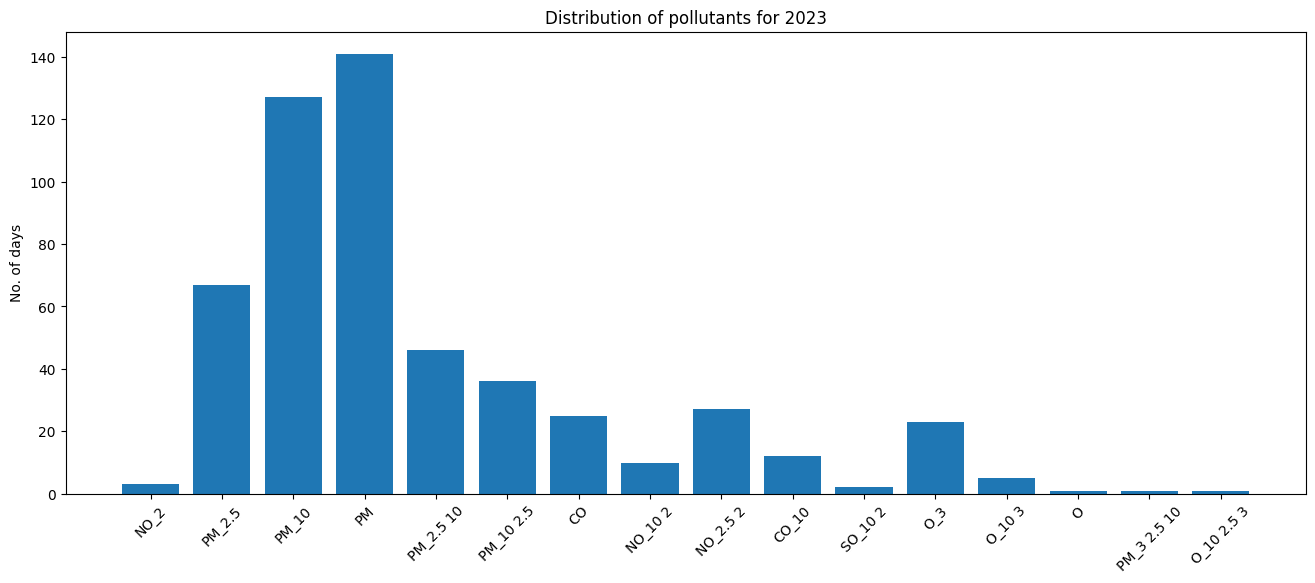

In [31]:
plt.figure(figsize=(16, 6))
plt.bar(pollutant_counter.keys(), pollutant_counter.values())
plt.title("Distribution of pollutants for 2023")
plt.ylabel("No. of days")
plt.xticks(rotation=45)
plt.show()